# Customer 360 degree View Dataset and Exploratory Data Analysis

**1. Data Preparation**
   
- Import libraries
- Load datasets

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
%matplotlib inline
import calendar
from pandas.api.types import CategoricalDtype

In [2]:
customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
sellers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
reviews = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
category_translation = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")

**2. Summary and Data Cleaning**

- Summary for all columns
- Search for missing value
- Drop missing value

In [3]:
# Renaming the input datasets
datasets = [customers, sellers, reviews, items, products, orders, payments, category_translation]
titles = ["customers", "sellers", "reviews", "items", "products", "orders", "payments", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]

data_summary.style.background_gradient(cmap='bwr')

,datasets,columns,total_cols,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,
1,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,
2,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,145903,"review_comment_title, review_comment_message"
3,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,
7,category_translation,"product_category_name, product_category_name_english",2,0,


**3. Merging Data**

All the previous datasets will be merged into one and will include all the neccessary columns for a costumer 360 degree analysis.

In [4]:
data = pd.merge(customers, orders, on="customer_id")
data = data.merge(reviews, on="order_id")
data = data.merge(items, on="order_id")
data = data.merge(products, on="product_id")
data = data.merge(payments, on="order_id")
data = data.merge(sellers, on='seller_id')
data = data.merge(category_translation, on='product_category_name')

data.info()
n2=data.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

**4. Dropping Missing Values**

As the dataset contains missing values, we will be dropping them, except for the columns of "*review_comment_title*" and "*review_comment_message*" and see how much is the percentage of our representative data.

In [5]:
data.dropna(subset=["order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "product_category_name", 
                    "product_name_lenght", 
                    "product_description_lenght",
                    "product_photos_qty",
                    "product_weight_g",
                    "product_length_cm", 
                    "product_height_cm",
                    "product_width_cm"],
            inplace=True)
n1=data.shape[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   order_id                       113193 non-null  object 
 6   order_status                   113193 non-null  object 
 7   order_purchase_timestamp       113193 non-null  object 
 8   order_approved_at              113193 non-null  object 
 9   order_delivered_carrier_date   113193 non-null  object 
 10  order_delivered_customer_date  113193 non-null  object 
 11  order_estimated_delivery_date  113193 non-null  object 
 12  review_id                     

In [6]:
print('After dropping null values in all rows except for column reviews, we still have {:0.1%} of the initial data, which is still a high percentage representation of the data'.format(n1/n2))

After dropping null values in all rows except for column reviews, we still have 97.9% of the initial data, which is still a high percentage representation of the data


In [7]:
#Changing the object type of columns to datetime type of data
data[['review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date','order_estimated_delivery_date']] = data[['review_creation_date', 'review_answer_timestamp',
    'order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

# CUSTOMER 360 VIEW DATASET

Here, I will create 20 new attributes that will go further detail to every customer's transaction, with the objective to help Olist Brazil team in creating better strategies to improve their services.

In [8]:
#1. Total orders of every customer

totalorders = data.groupby('customer_id').agg(total_orders=('order_item_id', 'sum'))
data = pd.merge(data, totalorders, on='customer_id')
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,3
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,3
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,31.0,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,31.0,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,2017-05-27 14:03:20,2017-05-27 14:15:16,2017-05-29 09:30:43,...,55.0,1,credit_card,10,232.19,89701,concordia,SC,la_cuisine,1
113189,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,...,43.0,1,credit_card,8,426.70,89701,concordia,SC,la_cuisine,1
113190,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,15.0,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine,1
113191,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,40.0,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine,2


From the output above, we can conclude that there are in total 94.490 costumers who have shopped in Olist Brazil. The column total_orders refer to the sum of items ordered by every costumer.

In [9]:
#2 & 3. Breaking down what days and months are of every order
data['Month'] =  pd.Series(pd.Categorical(data['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
data['Day'] = data['order_purchase_timestamp'].dt.day_name()
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_orders,Month,Day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,1,May,Tuesday
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday


From the two attributes that I created above, we can know which month of every year has the highest amount of transaction. Also, we can know what days of every week Brazilians customers tend to do online shopping. Therefore, we can create some marketing strategies to attract more sales on that month and day.

In [10]:
#Before creating bar chart, we need to know when did the data start and when did it end.
print('The collected datas are from date {} to date {}'.format(
    data.order_purchase_timestamp.min(),data.order_purchase_timestamp.max()))

The collected datas are from date 2016-10-03 09:44:50 to date 2018-08-29 15:00:37


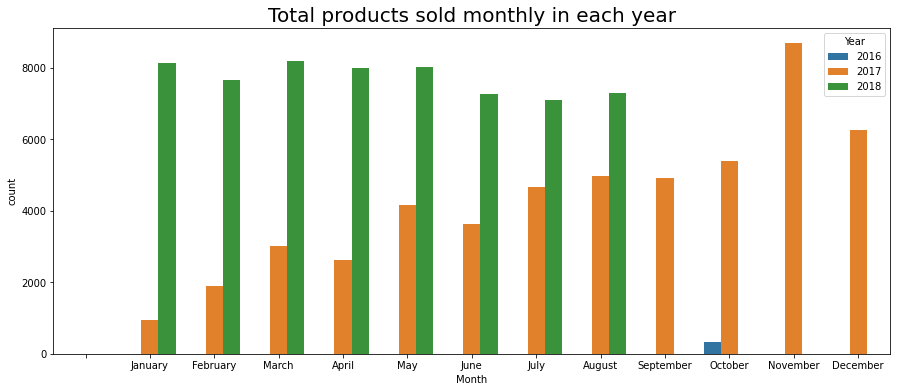

In [11]:
data['Year'] = data['order_purchase_timestamp'].dt.year
data['Month'] = data['order_purchase_timestamp'].dt.month_name()
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='Month',hue='Year',order=list(calendar.month_name));
plt.title('Total products sold monthly in each year', fontsize=20);

Since the data has just started to record by Oct 2016 and ended in Aug 2018, the previous month before Oct 2016 and after Aug 2018 wasn't involved. Therefore, all we could do in order for the information to not be misleading is comparing every months' total sales data for 3 years in a row even though it wasn't complete.

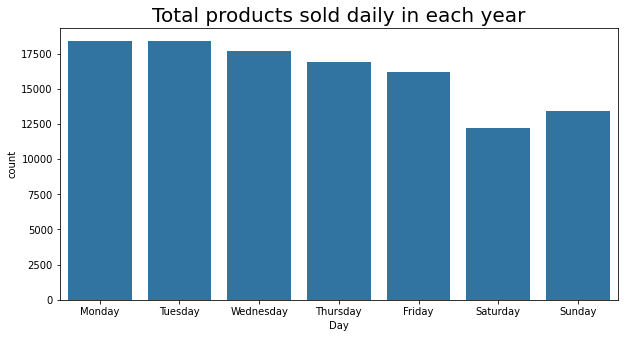

In [12]:
data['Day'] = data['order_purchase_timestamp'].dt.day_name()
plt.figure(figsize=(10,5))
basecolor=sns.color_palette()[0]
sns.countplot(data=data,x='Day',order=list(calendar.day_name),color=basecolor);
plt.title('Total products sold daily in each year', fontsize=20);

From the graph above, we can conclude that Brazilians tend to do online shopping on weekdays, especially on monday and tuesday.

In [13]:
#4. How much products have been sold in every Products' Category?
product_category = data.groupby('product_category_name_english').agg(total_products_category_sold=('product_category_name_english', 'count'))
data = pd.merge(data, product_category, on='product_category_name_english')
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_orders,Month,Day,Year,total_products_category_sold
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,8577,itaquaquecetuba,SP,office_furniture,1,May,Tuesday,2017,1748
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,275.79,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday,2017,1748
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,275.79,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday,2017,1748


The column total_products_category_sold informs us how much the products sold in every category, therefore, we are able to know which category has the highest amount of products sold.

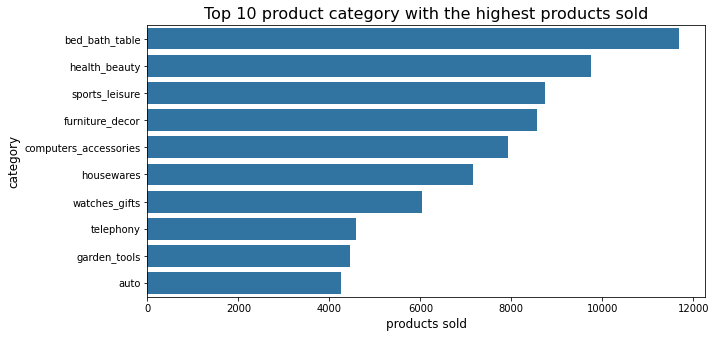

In [14]:
top10_product_category = data["product_category_name_english"].value_counts().head(10)
fig=plt.figure(figsize=(10,5))
#sns.set_style("darkgrid")
sns.barplot(y=top10_product_category.index, x=top10_product_category.values,color = basecolor)
plt.title('Top 10 product category with the highest products sold',fontsize=16);
plt.xlabel('products sold',fontsize=12);
plt.ylabel('category',fontsize=12);

From the graph above, we can conclude that products in the category of bed and bath table have the highest total sales in Brazil.

In [15]:
#5. How long does it take to finish an order?
data['delivery_time'] = data['order_delivered_customer_date'] - data['order_purchase_timestamp']
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_orders,Month,Day,Year,total_products_category_sold,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,office_furniture,1,May,Tuesday,2017,1748,8 days 19:30:00
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday,2017,1748,18 days 23:19:37
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,office_furniture,3,November,Thursday,2017,1748,18 days 23:19:37


Since we have changed the type of data to datetime, we can do the aggregation to find out how long does every order is delivered.

In [16]:
#Average time for logistic partners to finish an order
data['delivery_time'].mean()

Timedelta('12 days 10:36:04.031600894')

Olist's logistic partners tend to finish the orders by the average of 12 days 10 hours.

In [17]:
#6 & 7 & 8. RFM Segmentation
import datetime
snapshot_date = max(data.order_purchase_timestamp) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers1 = data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_item_id': 'count',
    'payment_value': 'sum'})
customers1.rename(columns = {'order_purchase_timestamp': 'recency',
                             'order_item_id': 'frequency',
                             'payment_value': 'monetary_value'}, inplace=True)
data = pd.merge(data, customers1, on='customer_id')
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,total_orders,Month,Day,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,1,May,Tuesday,2017,1748,8 days 19:30:00,470,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,office_furniture,3,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,office_furniture,3,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58


In [18]:
#9. How much products have been sold by each seller?
total_products = data.groupby('seller_id').agg(total_products_sold_seller = ('order_item_id', 'sum'))
data = pd.merge(data, total_products, on='seller_id')
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,total_orders,Month,Day,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value,total_products_sold_seller
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,May,Tuesday,2017,1748,8 days 19:30:00,470,1,146.87,2295
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,3,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,3,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295


We can get the total numbers of products sold by each seller.

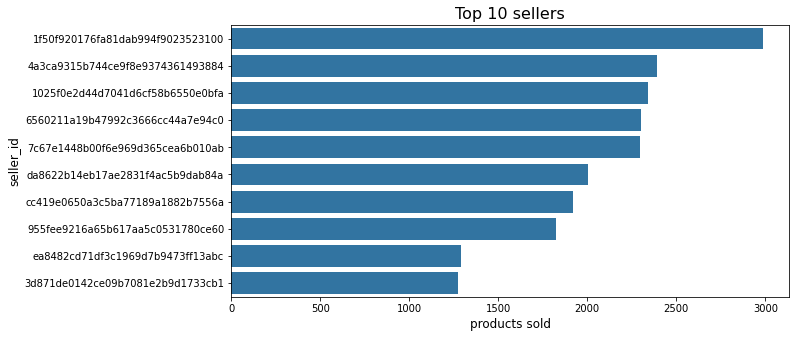

In [19]:
#Top 10 Sellers with the Highest Amount of Products Sold

top10_seller = data.groupby('seller_id').agg(total_products_sold_seller = ('order_item_id', 'sum'))
sorted_data = top10_seller.sort_values(by='total_products_sold_seller', ascending=False).head(10)
fig=plt.figure(figsize=(10,5))
#sns.set_style("darkgrid")
sns.barplot(y=sorted_data.index, x=sorted_data['total_products_sold_seller'],color = basecolor)
plt.title('Top 10 sellers',fontsize=16);
plt.xlabel('products sold',fontsize=12);
plt.ylabel('seller_id',fontsize=12);

From the graph above, we can see that each of the top 10 sellers has sold more than 1250 items throughout the period of Oct 2016 to Aug 2018.

In [20]:
#10. Percentage of Freight Value to Payment Value
data['percentage_freight'] = data['freight_value']/data['payment_value']*100
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Month,Day,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value,total_products_sold_seller,percentage_freight
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,May,Tuesday,2017,1748,8 days 19:30:00,470,1,146.87,2295,14.897528
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,November,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609


From the calculation above, we can know the percentage of freight value to total payment value.

In [21]:
#11. Classify of Review Score
def review_class (x):
    if x >= 4: return "Good"
    if x == 3: return "So so"
    else: return "Bad"
data['review_classification'] = data.review_score.apply(lambda row:review_class (row))
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Day,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value,total_products_sold_seller,percentage_freight,review_classification
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,Tuesday,2017,1748,8 days 19:30:00,470,1,146.87,2295,14.897528,Good
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,Thursday,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad


In [22]:
#Are Brazilians satisfied with the experiences of online shopping on Olist?
data['review_classification'].mode()

0    Good
dtype: object

Brazilians are satisfied with the orders they did since the modus of the review is a good one.

In [23]:
#12. How long does it take for a customer to give review?
data['review_time'] = data['review_answer_timestamp'] - data['review_creation_date']
data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value,total_products_sold_seller,percentage_freight,review_classification,review_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017,1748,8 days 19:30:00,470,1,146.87,2295,14.897528,Good,4 days 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad,2 days 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad,2 days 19:41:59


In [24]:
#Average time for a customer to fill in review section
data['review_time'].mean()

Timedelta('3 days 03:43:00.330930357')

Brazilians tend to fill the review survey sent by Olist by the average of 3 days 3 hours.

In [25]:
#Dropping some columns for convenient purpose
data.drop(['payment_sequential',
'payment_type',
'payment_installments',
'review_comment_title',
'order_approved_at',
'order_delivered_carrier_date',
'order_estimated_delivery_date',
'review_id',
'product_category_name',
'product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm'],
axis = 1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,...,Year,total_products_category_sold,delivery_time,recency,frequency,monetary_value,total_products_sold_seller,percentage_freight,review_classification,review_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,4,...,2017,1748,8 days 19:30:00,470,1,146.87,2295,14.897528,Good,4 days 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,...,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad,2 days 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,...,2017,1748,18 days 23:19:37,294,2,551.58,2295,9.028609,Bad,2 days 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,3,...,2017,1748,18 days 13:42:38,479,1,140.61,2295,11.108740,So so,1 days 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,4,...,2018,1748,25 days 01:23:20,207,1,137.58,2295,22.234336,Good,1 days 11:11:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,814605f2161337c56520639099b0199f,c5df80808db02b2e08abd92b9d964b9b,66033,belem,PA,872b07190c0c9c0f13475d2141c4036a,delivered,2018-07-03 10:10:12,2018-07-10 17:18:49,5,...,2018,59,7 days 07:08:37,58,2,337.44,25,11.480560,Good,1 days 13:06:54
113189,c4d135422be0d4333f506acde8af9419,5f684afb3d1a02f2787e80cb0eee6e02,2927,sao paulo,SP,6775b950cdc4da0ce39b261032f92c84,delivered,2018-06-13 12:19:26,2018-06-16 17:48:30,5,...,2018,59,3 days 05:29:04,78,1,31.42,25,23.647358,Good,0 days 23:38:51
113190,39eda8beee70b851aa9ba9040fb44615,9790c90c5b3a1a5237c11433331af1cb,83206,paranagua,PR,522eec5aa38ae3153b1c1a94e013947e,delivered,2018-07-05 16:25:40,2018-07-09 18:16:53,1,...,2018,59,4 days 01:51:13,55,1,63.41,25,29.049046,Bad,1 days 00:34:43
113191,84055878b8547a9f9944a8108146cf4f,f685c0b25dd0e6e5cc7afe41536f34c7,36037,juiz de fora,MG,d3cd9432f1869452249ac839d04a7964,delivered,2018-05-07 11:20:02,2018-05-17 17:56:17,5,...,2018,59,10 days 06:36:15,115,1,40.22,25,45.325709,Good,2 days 12:01:10


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    113193 non-null  object         
 1   customer_unique_id             113193 non-null  object         
 2   customer_zip_code_prefix       113193 non-null  int64          
 3   customer_city                  113193 non-null  object         
 4   customer_state                 113193 non-null  object         
 5   order_id                       113193 non-null  object         
 6   order_status                   113193 non-null  object         
 7   order_purchase_timestamp       113193 non-null  datetime64[ns] 
 8   order_approved_at              113193 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns] 
 10  order_delivered_customer_date  113193 non-null  datetime

# CONCLUSION

The customer 360 degree view dataset that I created consists of:
total_orders, month of the order, day of the order, year of the order, total_products_category_sold which explains how much products in every category have been sold, delivery_time that the logistic partners need to finish an order, recency of every customer, frequency of order or every customer, monetary_value that every customer spent, total_products_sold_seller which explains the amount of products sold by every seller, percentage_freight which explains the percentage of freight cost to the total payment value, review_classification which comes from every review score from customers, and review_time which explains how long does every customer take to fill review survey.

I also created some EDA and feature engineering to do some basic analysis of the data.